In [514]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statistics as st
from astropy.io import ascii
import sys
import imp
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')

import freedrift
imp.reload(freedrift)
# from scipy.io import FortranFile
# import struct

<module 'freedrift' from '/Users/H/INVERSE/Python/freedrift.py'>

In [2]:
location =  % pwd
location

'/Users/H/INVERSE/Code_dev/NA_i_o/NA_4d_scaled_ranges/Imposed_wide_angle'

In [319]:
nbals = 5
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
hice[0] = 1.0e-0
hifc[0] = hice[0]*fc
hice[1] = 1.0e-0
hifc[1] = hice[1]*fc
hice[2] = 0.9e-0
hifc[2] = hice[2]*fc
hice[3] = 0.9e-0
hifc[3] = hice[3]*fc
hice[4] = 1.0e-0
hifc[4] = hice[4]*fc

In [485]:
# changing to dimensional errors
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
ice_sig = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
ocn_mag = np.ndarray([nbals])
ocn_ang = np.ndarray([nbals])
ocn_sig = np.ndarray([nbals])
uocn = np.ndarray([nbals])
vocn = np.ndarray([nbals])
# set up wind and ocean
wind_mag[0] = 1.1
wind_ang[0] = np.deg2rad(0)
wind_sig[0] = 0.1*wind_mag[0]
uwind[0]    = wind_mag[0]*np.cos(wind_ang[0])
vwind[0]    = wind_mag[0]*np.sin(wind_ang[0])
ocn_mag[0]  = 0.1
ocn_ang[0]  = np.deg2rad(10)
ocn_sig[0] = 0.01*ocn_mag[0]  
uocn[0]     = ocn_mag[0]*np.cos(ocn_ang[0])
vocn[0]     = ocn_mag[0]*np.sin(ocn_ang[0])

wind_mag[1] = 2.1
wind_ang[1] = np.deg2rad(15)
wind_sig[1] = 0.1*wind_mag[1]
uwind[1]    = wind_mag[1]*np.cos(wind_ang[1])
vwind[1]    = wind_mag[1]*np.sin(wind_ang[1])
ocn_mag[1]  = 0.02
ocn_ang[1]  = np.deg2rad(-49)
ocn_sig[1] = 0.01*ocn_mag[1]
uocn[1]     = ocn_mag[1]*np.cos(ocn_ang[1])
vocn[1]     = ocn_mag[1]*np.sin(ocn_ang[1])

wind_mag[2] = 0.6
wind_ang[2] = np.deg2rad(110)
wind_sig[2] = 0.1*wind_mag[2]
uwind[2]    = wind_mag[2]*np.cos(wind_ang[2])
vwind[2]    = wind_mag[2]*np.sin(wind_ang[2])
ocn_mag[2]  = 0.06
ocn_ang[2]  = np.deg2rad(63)
ocn_sig[2] = 0.01*ocn_mag[2]
uocn[2]     = ocn_mag[2]*np.cos(ocn_ang[2])
vocn[2]     = ocn_mag[2]*np.sin(ocn_ang[2])

wind_mag[3] = 0.5
wind_ang[3] = np.deg2rad(12)
wind_sig[3] = 0.1*wind_mag[3]
uwind[3]    = wind_mag[3]*np.cos(wind_ang[3])
vwind[3]    = wind_mag[3]*np.sin(wind_ang[3])
ocn_mag[3]  = 0.03
ocn_ang[3]  = np.deg2rad(135)
ocn_sig[3] = 0.01*ocn_mag[3]
uocn[3]     = ocn_mag[3]*np.cos(ocn_ang[3])
vocn[3]     = ocn_mag[3]*np.sin(ocn_ang[3])

wind_mag[4] = 4.0
wind_ang[4] = np.deg2rad(1)
wind_sig[4] = 0.1*wind_mag[4]
uwind[4]    = wind_mag[4]*np.cos(wind_ang[4])
vwind[4]    = wind_mag[4]*np.sin(wind_ang[4])
ocn_mag[4]  = 0.001
ocn_ang[4]  = np.deg2rad(-114)
ocn_sig[4] = 0.1*ocn_mag[4]
uocn[4]     = ocn_mag[4]*np.cos(ocn_ang[4])
vocn[4]     = ocn_mag[4]*np.sin(ocn_ang[4])

# Ca_min = 1.0e-6
# Ca_max = 2.0e-3
# Co_min = 1.0e-3
# Co_max = 6.0e-2

In [486]:
# constants
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 
fc   = 1.46e-4 

# going to pass N2a and rop ranges directly now

Ca     = 5e-3
ThetaA = np.deg2rad(5)
Co     = 1e-2
ThetaO = np.deg2rad(20) # original

# invert for thO and thA-thO
# # these replace for thO
# thA_min = ThetaO - np.deg2rad(90)
# thA_max = ThetaO + np.deg2rad(90)
# # these replace for thA-thO
# thO_min = (ThetaA - ThetaO) - np.deg2rad(90)
# thO_max = (ThetaA - ThetaO) + np.deg2rad(90)
# these replace for thO
thA_min =  - np.deg2rad(90)
thA_max =  + np.deg2rad(90)
# these replace for thA-thO
thO_min =  - np.deg2rad(90)
thO_max =  + np.deg2rad(90)


nansen_use = freedrift.nansen(Ca,Co)**2
rossby_use = freedrift.rossby_pp(Co)
n2a_min = nansen_use*1e-1
n2a_max = nansen_use*2e0
rop_min = rossby_use*1e-1
rop_max = rossby_use*2e0
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)

6.09161793372e-05 0.02468120324 0.000609161793372 0.00121832358674
8.937621832358674 89.37621832358674 178.75243664717348


In [553]:
# now generate arbitrary synthetic values
nbals = 20
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
ocn_mag = np.ndarray([nbals])
ocn_ang = np.ndarray([nbals])
uocn = np.ndarray([nbals])
vocn = np.ndarray([nbals])
for i in range(nbals):
    wind_mag[i] = np.random.normal(loc=5.0,scale=4)
    wind_mag[i] = np.random.uniform(0,15.0)
    wind_mag[i] = np.max([wind_mag[i],0.5])
    wind_ang[i] = np.random.uniform(-90,90)
    uwind[i]    = wind_mag[i]*np.cos(wind_ang[i])
    vwind[i]    = wind_mag[i]*np.sin(wind_ang[i])
    ocn_mag[i]  = np.random.normal(loc=0.06,scale=0.05)
    ocn_mag[i] = np.max([ocn_mag[i],0.0])
    ocn_ang[i] = np.random.uniform(-45,135)
    uocn[i]     = ocn_mag[i]*np.cos(ocn_ang[i])
    vocn[i]     = ocn_mag[i]*np.sin(ocn_ang[i])
    hice[i] = np.random.normal(loc=0.9,scale=0.3)
    hice[i] = np.max([hice[i],0.5])
    hifc[i] = hice[i]*fc

4.74991517539 0.111034795091 0.112801691619 0.0576454971754 0.0121361108666
7.25109375245 0.154776040663 0.109393604226 -0.073894277455 -0.0101907767266
2.12667552809 0.0512207131481 0.0 0.039940539685 0.0187807397778
6.70297349659 0.175433013426 0.0733060374305 -0.0616029648523 -0.00919039361914
13.6279703765 0.359810512388 0.0172309764626 0.0130925840866 0.000960714158075
5.14971142421 0.152088892758 0.0308439559677 -0.10731398348 -0.0208388343812
2.98540591147 0.208359401864 0.146090310289 -0.0154062787426 -0.00516053066132
7.45817778448 0.162865511023 0.0184380339579 -0.0828197322988 -0.0111045532424
3.97365101102 0.1260562429 0.033776566517 -0.0 -0.0
5.633930355 0.208042930715 0.0796753204819 -0.0 -0.0
7.55818156063 0.184515966795 0.0 -0.103866323931 -0.0137422372164
2.47477471185 0.0421303711383 0.0335386794737 -0.141330259201 -0.0571083333464
4.90889562221 0.121309376652 0.00711399796243 0.00806710213597 0.00164336395736
11.1242294398 0.228032252678 0.0384806659323 0.01237183577

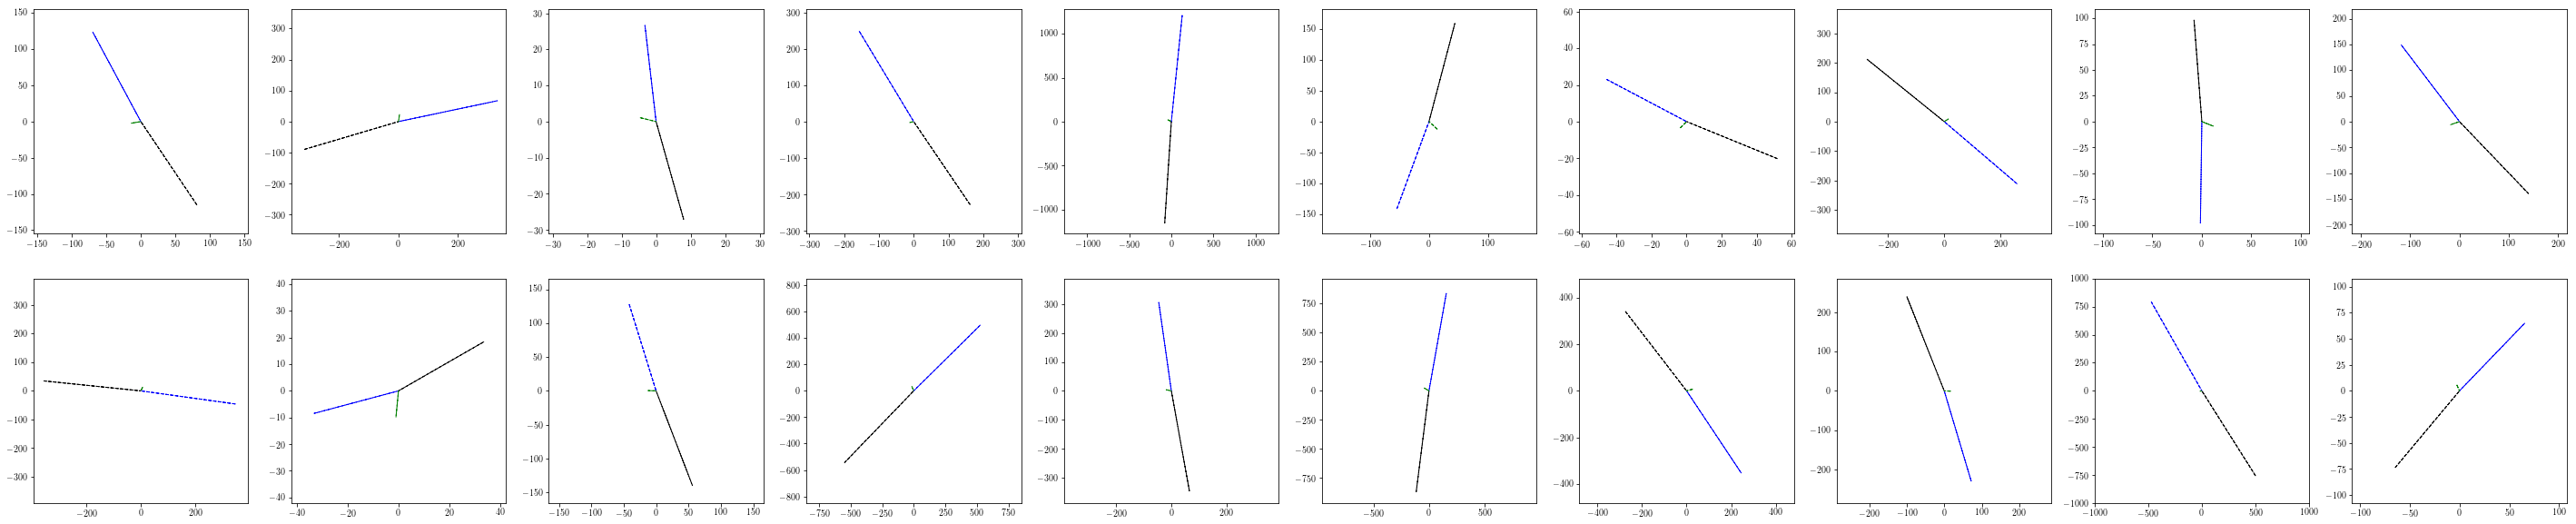

In [554]:
ice_ocn_mag = np.ndarray([nbals])
na2 = np.ndarray([nbals])
rop = np.ndarray([nbals])
thA = np.ndarray([nbals])
thO = np.ndarray([nbals])
i_o_mag = np.ndarray([nbals])
i_o_sig = np.ndarray([nbals])
ui_o = np.ndarray([nbals])
vi_o = np.ndarray([nbals])
sig_c = 0.05 # plus/minus lever for random error
sig_w = 0.05
sig_i = 0.05
# problem 1

for i in range(nbals):
    Na2 = freedrift.nansen(Ca,Co)**2*np.random.normal(loc=1.0,scale=sig_c)
    RoP = freedrift.rossby_pp(Co)*hifc[i]*np.random.normal(loc=1.0,scale=sig_c)
    ThA = ThetaA*np.random.normal(loc=1.0,scale=sig_c)
    ThO = ThetaO*np.random.normal(loc=1.0,scale=sig_c)
    uice[i],vice[i] = freedrift.ice_mag(uwind[i],vwind[i],uocn[i],vocn[i],
                 Na2,RoP,ThA,ThO)
    ice_mag[i]     = np.hypot(uice[i],vice[i])
    ui_o[i] = uice[i] - uocn[i]
    vi_o[i] = vice[i] - vocn[i]
    i_o_mag[i]     = np.hypot(ui_o[i],vi_o[i])
    wind_sig[i] = sig_w*wind_mag[i]
    i_o_sig[i] = sig_i*i_o_mag[i]
[print(wind_mag[i],ice_mag[i],ocn_mag[i],ice_ocn_mag[i],ice_ocn_mag[i]/wind_mag[i])  for i in range(nbals)];
[print(wind_sig[i],i_o_sig[i])  for i in range(nbals)];

# disassemble forces
# forcing_1
orig_forces = np.empty([nbals,6])
# for j in tqdm(data_NA['number']-1):
for i in range(nbals):
    orig_forces[i,:] = freedrift.force_bal(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          rhoa*Ca,rhoo*Co,rhoi*hifc[i],
                          ThetaA,ThetaO)

force_magw = np.empty([nbals])
for i in range(nbals):
    force_magw[i] = np.max(np.hypot(orig_forces[i,0],orig_forces[i,1]))

wnd_scale = 1100
force_scale = 1000
# plt.figure(figsize=[10*nbals,10])
plt.figure(figsize=[50,10])
# plt.figure(figsize=[10,10])
for nb in range(nbals):
# for nb in range(3,4):
#     plt.subplot(1,nbals,nb+1)
    plt.subplot(2,10,nb+1)
#     plt.subplot(1,1,1)
    #   calculated vectors
#     for j in tqdm(range(0,data_NA['number'][-1],10)):
#         plt.arrow(0,0,wnd_scale*orig_vecs[j,nb,0],wnd_scale*orig_vecs[j,nb,1],
#                    alpha=0.009,color='k')
#         plt.arrow(0,0,orig_vecs[j,nb,2],orig_vecs[j,nb,3],
#                    alpha=0.009,color='b')
#         plt.arrow(0,0,orig_vecs[j,nb,4],orig_vecs[j,nb,5],
#                    alpha=0.009,color='g')
    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               linestyle='dashed',color='k')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               linestyle='dashed',color='b')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               linestyle='dashed',color='g')
    #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-ui_o[nb],-vi_o[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],0.02)))]) 
plt.show()

In [555]:
i=4
freedrift.wnd_i_o_mag(ui_o[i],vi_o[i],100*Na2,0.1*RoP,np.deg2rad(120),np.deg2rad(-10)),uwind[i],vwind[i]
# freedrift.i_o_mag(uwind[i],vwind[i],100*Na2,0.01*RoP,np.deg2rad(120),np.deg2rad(0)),ui_o[i],vi_o[i]

((-0.57740651453618819, 1.2967097189467829),
 -2.1126940971857211,
 -13.46321284966101)

In [556]:
np.hypot(orig_forces[:,4],orig_forces[:,5])

array([ 0.01406815,  0.02360494,  0.00477137,  0.0126159 ,  0.04674446,
        0.01891909,  0.00505005,  0.01783995,  0.01234415,  0.01955039,
        0.01496435,  0.00994967,  0.01263931,  0.03777784,  0.01948163,
        0.04929198,  0.02825919,  0.01722559,  0.02006246,  0.0063483 ])

In [557]:
print(uwind[0])
for i in range(nbals):
    uwind[i] = uwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    vwind[i] = vwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    wind_mag[i]     = np.hypot(uwind[i],vwind[i])
    ui_o[i] = ui_o[i]+np.random.normal(loc=0,scale=i_o_sig[i])
    vi_o[i] = vi_o[i]+np.random.normal(loc=0,scale=i_o_sig[i])
    i_o_mag[i]     = np.hypot(ui_o[i],vi_o[i])
print(uwind[0])

2.3832741576
2.50496331649


In [558]:
# try some scaling factors
Na2_scale = 0.020**2
beta_a = np.ndarray([nbals])
beta_i = np.ndarray([nbals])
beta_w = np.ndarray([nbals])
beta_fb= np.ndarray([nbals])
for i in range(nbals):
    beta_a[i] = i_o_mag[i]**-2*Na2_scale**3
    beta_i[i] = wind_mag[i]**-2*Na2_scale
    beta_w[i] = wind_mag[i]**-2*Na2_scale
    beta_fb[i]= wind_mag[i]**-4

# ### try some scaling factors
# Na2_scale = 0.015**2
# beta_a = np.ndarray([nbals])
# beta_i = np.ndarray([nbals])
# beta_w = np.ndarray([nbals])
# beta_fb= np.ndarray([nbals])
for i in range(nbals):
    beta_a[i] = 1.0 # ice_ocn_mag[i]**-2*Na2_scale**3
    beta_i[i] = 1.0 # iwind_mag[i]**-2*Na2_scale
    beta_w[i] = 1.0 # iwind_mag[i]**-2*Na2_scale
    beta_fb[i]= 1.0 # iwind_mag[i]**-4

# aggregate errors - bad winds mean bad everything
wind_sig_use = np.ndarray([nbals])
i_o_sig_use = np.ndarray([nbals])
for i in range(nbals):
    wind_sig_use[i] = wind_sig[i]
    i_o_sig_use[i] = np.maximum(wind_sig[i]/wind_mag[i],i_o_sig[i]/i_o_mag[i])*i_o_mag[i]

In [559]:
its = 35
it1 = 200
itn = 150
res = 35

# open na.in
# Open file
f = open(location+'/na.in', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

# Loop over lines and extract variables of interest
# read p1
columns1 = f.readline()
var = columns1.split()[0]
c1_len = len(var)
# its = int(var)
# read p2
columns2 = f.readline()
var = columns2.split()[0]
c2_len = len(var)
# it1 = int(var)
# read p3
columns3 = f.readline()
var = columns3.split()[0]
c3_len = len(var)
# itn = int(var)
# read p4
columns4 = f.readline()
var = columns4.split()[0]
c4_len = len(var)
# res = int(var)

tail1 = f.readline()
tail2 = f.readline()
tail3 = f.readline()
tail4 = f.readline()
tail5 = f.readline()

f.close()
# print(its,it1,itn,res)

# write na.in
# Open file
f = open(location+'/na.in', 'w')

# write and ignore header lines
f.writelines(header1)
f.writelines(header2)
f.writelines(header3)
f.writelines(header4)

# write its
f.writelines(str(its)+columns1[c1_len:-1]+'\n')
# write it1
f.writelines(str(it1)+columns2[c2_len:-1]+'\n')
# write it1
f.writelines(str(itn)+columns3[c3_len:-1]+'\n')
# write it1
f.writelines(str(res)+columns4[c4_len:-1]+'\n')

f.writelines(tail1)
f.writelines(tail2)
f.writelines(tail3)
f.writelines(tail4)
f.writelines(tail5)

f.close()

In [560]:
# write freedrift_IC
data_in = np.ndarray([nbals*12+12],dtype='float32')
r = 0;
data_in[r] = nbals;r+=1
# wind data
data_in[r:r+nbals] = uwind;r+=nbals
data_in[r:r+nbals] = vwind;r+=nbals
data_in[r:r+nbals] = wind_mag;r+=nbals
data_in[r:r+nbals] = wind_sig_use;r+=nbals
# i_o data
data_in[r:r+nbals] = ui_o;r+=nbals
data_in[r:r+nbals] = vi_o;r+=nbals
data_in[r:r+nbals] = i_o_mag;r+=nbals
data_in[r:r+nbals] = i_o_sig_use;r+=nbals
# scaling betas
data_in[r:r+nbals] = beta_a ;r+=nbals
data_in[r:r+nbals] = beta_i ;r+=nbals
data_in[r:r+nbals] = beta_fb;r+=nbals
# other data/constants
data_in[r:r+nbals] = hifc;r+=nbals
data_in[r] = rhoa ;r+=1
data_in[r] = rhoi ;r+=1
data_in[r] = rhoo ;r+=1
# special for range
data_in[r] = n2a_min;r+=1
data_in[r] = n2a_max;r+=1
data_in[r] = rop_min;r+=1
data_in[r] = rop_max;r+=1
data_in[r] = thA_min;r+=1
data_in[r] = thA_max;r+=1
data_in[r] = thO_min;r+=1
data_in[r] = thO_max;r+=1
# data_in[r] = thA_min/2;r+=1
# data_in[r] = thA_max/2;r+=1
# data_in[r] = thO_min/2;r+=1
# data_in[r] = thO_max/2;r+=1
f = open(location+'/freedrift_IC','wb')
data_in.tofile(f,sep=' ')
f.close()

In [572]:
# now run the model - freedrift_na
! bin/freedrift_na 

# convert output to ascii nad2asc
! ./nad2asc na.nad na.asc

# read output
data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])

##### filter misfits
misfit_filter = 1e5
misfit_min = data_NA['misfit'][0]
misfit_max = 0.0
misfit_min_no = 0
for i in data_NA['number'][0:-1]:
    if data_NA['misfit'][i] < misfit_min:
        misfit_min = data_NA['misfit'][i]
        misfit_min_no = i
    if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
        misfit_max = data_NA['misfit'][i]
misfit_range = misfit_max/misfit_min
misfit_cut = misfit_min * (1.0 + misfit_range *  1e-2) 
# number_cut = int(3*data_NA['number'][-1]/4)
number_cut = 0
data_NA_cut = np.empty([6,data_NA['number'][-1]])
#
i_cut = -1
for i in data_NA['number'][number_cut:-1]:
    if data_NA['misfit'][i] < misfit_cut:
        i_cut += 1
        data_NA_cut[0,i_cut] = data_NA['number'][i]
        data_NA_cut[1,i_cut] = data_NA['Na'][i]
        data_NA_cut[2,i_cut] = data_NA['Ro'][i]
        data_NA_cut[3,i_cut] = data_NA['thO'][i]
        data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
        data_NA_cut[5,i_cut] = data_NA['misfit'][i]
print(i_cut, misfit_min_no,np.mean(data_NA_cut[5,0:i_cut+1]))


  User routines output

  Opening freedrift files...

 Number of balances this time  =    20.0000000              20

  Successfuly read  freedrift files...


  Imposed Parameter space

  nd = 4, Ca, thetaA, Co, thetaO

  Adjusted Parameter space

  nd = 4, Na, Ro,  thetaA, thetaO

  Adjusted Parameter space 2

  nd = 4, Na2, Ro_p,  thetaO, thetaA - thetaOO

  Now invert           20  problems with same parameters
  Problem            1
  Wind_mag =    4.97612333    
  I_O_mag  =   0.117353931    
  Problem            2
  Wind_mag =    7.48422813    
  I_O_mag  =   0.200601161    
  Problem            3
  Wind_mag =    1.95210660    
  I_O_mag  =    4.93160561E-02
  Problem            4
  Wind_mag =    6.27842379    
  I_O_mag  =   0.184461206    
  Problem            5
  Wind_mag =    13.9081030    
  I_O_mag  =   0.321401030    
  Problem            6
  Wind_mag =    4.90172386    
  I_O_mag  =   0.120680660    
  Problem            7
  Wind_mag =    2.95314050    
  I_O_mag  =    6


  start forward modeling iteration:           34
  finished forward modeling
  min/max cpu time for fwd on root node is    3.44999996E-03 /   7.08399992E-03

  start forward modeling iteration:           35
  finished forward modeling
  min/max cpu time for fwd on root node is    3.44999996E-03 /   7.08399992E-03
  
  
  
 Performance statistics
  
 Total number of full dlist evaluations        1225
 Total number of partial dlist updates        19775
 Lowest misfit found                      134.270218    
 Average misfit over all models           134.279663    
 Index of lowest misfit model                  5151

 Total cpu time spent partially updating dlist             0.735013247    
 Total cpu time spent evaluating dlist                0.102858000    
 Total cpu time spent finding Voronoi intersections    1.18499911    
 Total cpu time spent calculating random deviates      1.87950395E-02
 Total cpu time resetting random walks                 1.06500008E-03
 Total cpu time for or

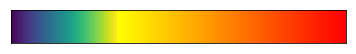

In [573]:
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()

In [574]:
# want the medain of all from data_NA_cut
# first Na2
nansen_calc = st.median(data_NA_cut[1,0:i_cut])
rossby_calc = st.median(data_NA_cut[2,0:i_cut])
thO_calc    = st.median(data_NA_cut[3,0:i_cut])
thA_O_calc  = st.median(data_NA_cut[4,0:i_cut])
print('Nansen set',np.sqrt(nansen_use),'and calculated',np.sqrt(data_NA['Na'][misfit_min_no]),np.sqrt(nansen_calc))
print('Rossby set',rossby_use,'and calculated',data_NA['Ro'][misfit_min_no],rossby_calc)
print('ThetaA set',np.rad2deg(ThetaA),'and calculated',
      np.rad2deg(data_NA['thA-O'][misfit_min_no]+data_NA['thO'][misfit_min_no]),np.rad2deg(thA_O_calc + thO_calc))
print('ThetaO set',np.rad2deg(ThetaO),'and calculated',np.rad2deg(data_NA['thO'][misfit_min_no]),np.rad2deg(thO_calc))
print('ThetaA - O set',np.rad2deg(ThetaA - ThetaO),'and calculated',np.rad2deg(data_NA['thA-O'][misfit_min_no]),np.rad2deg(thA_O_calc))
print('Ca calculated',(data_NA['Na'][misfit_min_no]/data_NA['Ro'][misfit_min_no])*(rhoi/rhoa))
print('Co calculated',(rhoi/rhoo)/data_NA['Ro'][misfit_min_no])
print('Ca calculated',(nansen_calc/rossby_calc*(rhoi/rhoa)))
print('Co calculated',(rhoi/rhoo)/rossby_calc)

Nansen set 0.02468120324 and calculated 0.0239754642708 0.0240037411876
Rossby set 89.37621832358674 and calculated 91.4518814 92.0667343
ThetaA set 5.0 and calculated -48.4785517136 -44.9644569415
ThetaO set 20.0 and calculated -32.4770509262 -29.0587871269
ThetaA - O set -15.0 and calculated -16.0015007874 -15.9056698146
Ca calculated 0.00461105953697
Co calculated 0.00977303221709
Ca calculated 0.0045910757145
Co calculated 0.00970776459088


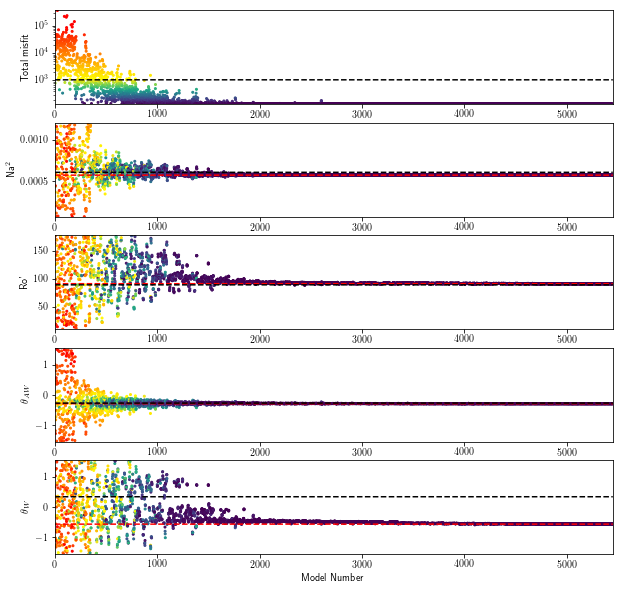

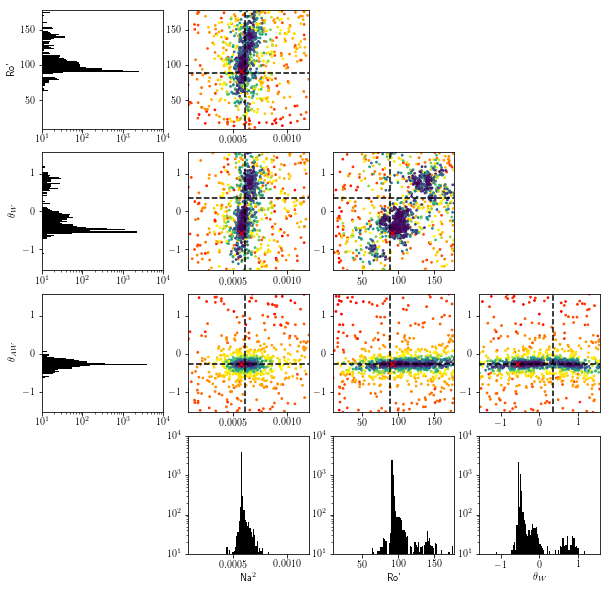

In [575]:
# plot misfit
# cmin = 1e-10
# cmax = 1e2
plt.figure(figsize=[10,10])
plt.subplot(5,1,1)
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot(5,1,2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[nansen_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
# plt.savefig('misfit_all_100%.pdf')
plt.subplot(5,1,3)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[rossby_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.subplot(5,1,4)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaA-ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{AW}$')
plt.subplot(5,1,5)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{W}$')
plt.xlabel('Model Number')
plt.show()
# plot trade off
th1 = ThetaO
th2 = ThetaA - ThetaO
# x - Na y - Ro
plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# horizontal hists
plt.subplot(4,4,1)
plt.hist(data_NA['Ro'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(data_NA['thO'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{W}$')
plt.subplot(4,4,9)
plt.hist(data_NA['thA-O'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{AW}$')
# x - Na y - Ro
plt.subplot(4,4,2)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('Ro')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# x - Na y - thA
plt.subplot(4,4,6)
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thO')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Ro y - thA
plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Na y - thO
plt.subplot(4,4,10)
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thA-O')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - Ro y - thO
plt.subplot(4,4,11)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - thA y - thO
plt.subplot(4,4,12)
plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# bottom row histograms
plt.subplot(4,4,14)
plt.hist(data_NA['Na'],bins=100,color='k')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(data_NA['Ro'],bins=100,color='k')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(data_NA['thO'],bins=100,color='k')
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'$\theta_{W}$')
plt.show()
# plt.savefig('trade_off_all_100%.pdf')

In [565]:
# disassemble vectors
# forcing_1
vec_strd = 10
all_vecs = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd+1),nbals,5])
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
# for j in range(misfit_min_no,misfit_min_no+1):
    for i in range(nbals):
        all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_i_o_mag(
                          ui_o[i],vi_o[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.i_o_mag(
                          uwind[i],vwind[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_vecs[jj,i,4] = data_NA['misfit'][j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals):
    all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_i_o_mag(
                          ui_o[i],vi_o[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.i_o_mag(
                          uwind[i],vwind[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,4] = data_NA['misfit'][j]
        

In [566]:
# disassemble forces
# forcing_1
all_forces = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd+1),nbals,7])
# for j in tqdm(data_NA['number']-1):
# for j in range(data_NA['number'][-1]-10,data_NA['number'][-1]-1):
# for j in tqdm(data_NA['number']-1):
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
# for j in range(misfit_min_no-1,misfit_min_no+1):
    for i in range(nbals):
        [all_forces[jj,i,0],all_forces[jj,i,1],all_forces[jj,i,2],
         all_forces[jj,i,3],all_forces[jj,i,4],all_forces[jj,i,5]] = freedrift.force_bal(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_forces[jj,i,:] = freedrift.force_bal(
#                           all_vecs[jj,i,0],all_vecs[jj,i,1],all_vecs[jj,i,2],all_vecs[jj,i,3],
#                           data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_forces[jj,i,6] = data_NA['misfit'][j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals):
    [all_forces[jj,i,0],all_forces[jj,i,1],all_forces[jj,i,2],
     all_forces[jj,i,3],all_forces[jj,i,4],all_forces[jj,i,5]] = freedrift.force_bal(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_forces[jj,i,:] = freedrift.force_bal(
#                           all_vecs[jj,i,0],all_vecs[jj,i,1],all_vecs[jj,i,2],all_vecs[jj,i,3],
#                           data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_forces[jj,i,6] = data_NA['misfit'][j] 
    

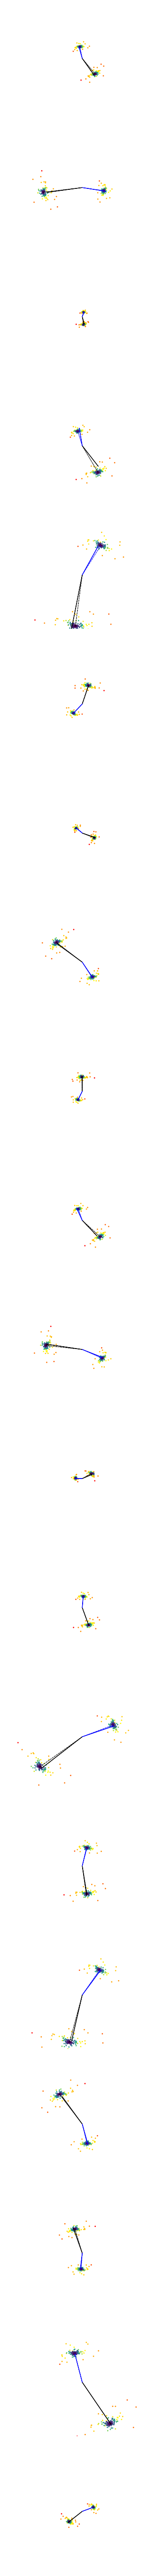

In [567]:
# want arrows for the obs and best, scatter all the rest with mymap
wnd_range = np.max(wind_mag)
wnd_range = 0.99*np.max(np.maximum(all_vecs[-1,:,0:2],wnd_range))
wnd_scale = 0.04
plt.figure(figsize=[5,5*nbals])
plt.rc('text', usetex=True)
for nb in range(nbals):
# for nb in range(nbals):
    ax = plt.subplot(nbals,1,nb+1)
#     #   calculated vectors
    # wind
    plt.scatter(wnd_scale*all_vecs[:,nb,0],wnd_scale*all_vecs[:,nb,1],c=np.log(all_vecs[:,nb,4]),s=3,cmap=mymap)
    plt.scatter(-all_vecs[:,nb,2],-all_vecs[:,nb,3],c=np.log(all_vecs[:,nb,4]),s=3,cmap=mymap)
    plt.clim(np.log([cmin,cmax]))
# #     for j in tqdm(range(0,data_NA['number'][-1],10)):
# #         plt.arrow(0,0,wnd_scale*all_vecs[j,nb,0],wnd_scale*all_vecs[j,nb,1],
# #                    alpha=0.009,color='k')
# #         plt.arrow(0,0,all_vecs[j,nb,2],all_vecs[j,nb,3],
# #                    alpha=0.009,color='b')
# #         plt.arrow(0,0,all_vecs[j,nb,4],all_vecs[j,nb,5],
# #                    alpha=0.009,color='g')
    plt.arrow(0,0,wnd_scale*all_vecs[-1,nb,0],wnd_scale*all_vecs[-1,nb,1],
               length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.7)
    plt.arrow(0,0,-all_vecs[-1,nb,2],-all_vecs[-1,nb,3],
               length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.7)
#     #   original vectors
    plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],
              color='k',length_includes_head = 'true',width=0.0015)
    plt.arrow(0,0,-ui_o[nb],-vi_o[nb],
              color='b',length_includes_head = 'true',width=0.0015)
    plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
# #     plt.arrow(-wnd_scale/2,-wind_mag[nb]*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wind_mag[nb]*wnd_scale/4,wnd_scale,0,
# # #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-wnd_range*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wnd_range*wnd_scale/4,wnd_scale,0,
# #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.text(wnd_scale,-wind_mag[nb]*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
# #     plt.text(wnd_scale,-3*wind_mag[nb]*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-wnd_range*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-3*wnd_range*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
    ax.axis('off')
plt.show()

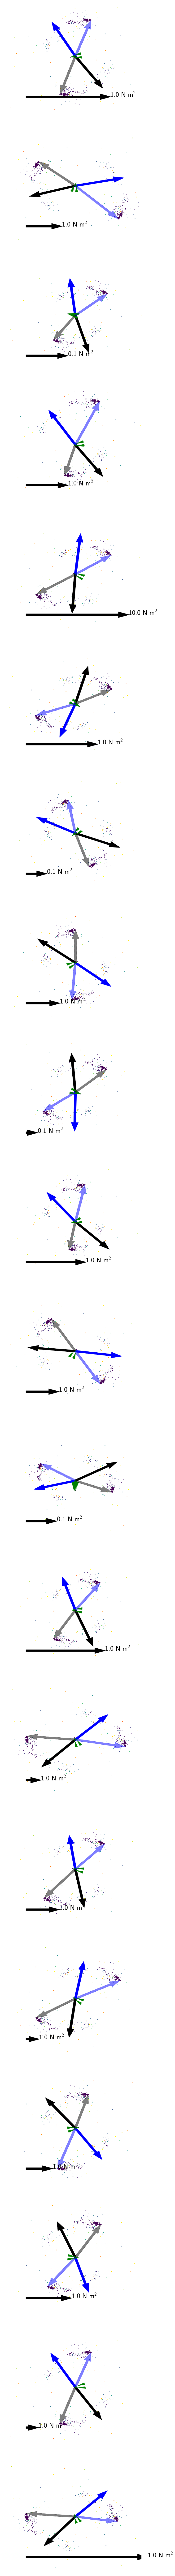

In [568]:
leg_len = np.ndarray([nbals])
for i in range(nbals):
    leg_len[i] = 10.0**np.ceil(np.log10((np.hypot(all_forces[-1,i,0],all_forces[-1,i,1]))))
# leg_len

wnd_scale = 55
force_scale = 40
plt.figure(figsize=[10,10*nbals])
# plt.figure(figsize=[10,10])
for nb in range(nbals):
   
    ax = plt.subplot(nbals,1,nb+1)
#     plt.subplot(1,1,1)

    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               color='b',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               color='g',width = force_magw[nb]*2,length_includes_head = 'true')

    plt.arrow(0,0,force_scale*all_forces[-1,nb,0],force_scale*all_forces[-1,nb,1],
               linestyle='dashed',color='k',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[-1,nb,2],force_scale*all_forces[-1,nb,3],
               linestyle='dashed',color='b',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[-1,nb,4],force_scale*all_forces[-1,nb,5],
               linestyle='dashed',color='g',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.scatter(force_scale*all_forces[:,nb,0],force_scale*all_forces[:,nb,1],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(force_scale*all_forces[:,nb,2],force_scale*all_forces[:,nb,3],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(force_scale*all_forces[:,nb,4],force_scale*all_forces[:,nb,5],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
#     #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-ui_o[nb],-vi_o[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.arrow(-3*wnd_scale*force_magw[nb]/4,-3*wnd_scale*force_magw[nb]/4,leg_len[nb]*1e1,0,
              color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.text(-3*wnd_scale*force_magw[nb]/4+leg_len[nb]*1e1,-3*wnd_scale*force_magw[nb]/4,
             str(leg_len[nb])+' N m$^2$',fontsize=30,horizontalalignment='left')
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],0.02)))]) 
    ax.axis('off')
plt.show()

In [569]:
# disassemble misfits
vec_strd = 10
all_misfits = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd),nbals,4])
# for j in tqdm(data_NA['number']-1):
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
    for i in range(nbals):
        all_misfits[jj,i,0] = freedrift.misfit_a_io(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_a[i]/wind_sig_use[i]**2
        all_misfits[jj,i,1] = freedrift.misfit_i_o(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_i[i]/i_o_sig_use[i]**2
        fb_ratio = np.mean([wind_sig_use[i]/wind_mag[i],
                     i_o_sig_use[i]/i_o_mag[i]]) 
        all_misfits[jj,i,2] = freedrift.misfit_fb2(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j]*data_NA['Ro'][j]/rhoi,
                          rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_fb[i]/fb_ratio**2
        all_misfits[jj,i,3] = data_NA['misfit'][j]
    jj += 1

In [570]:
freedrift.misfit_fb2(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j]*data_NA['Ro'][j]/rhoi,
                          rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )/fb_ratio**2

2.7498681136996539

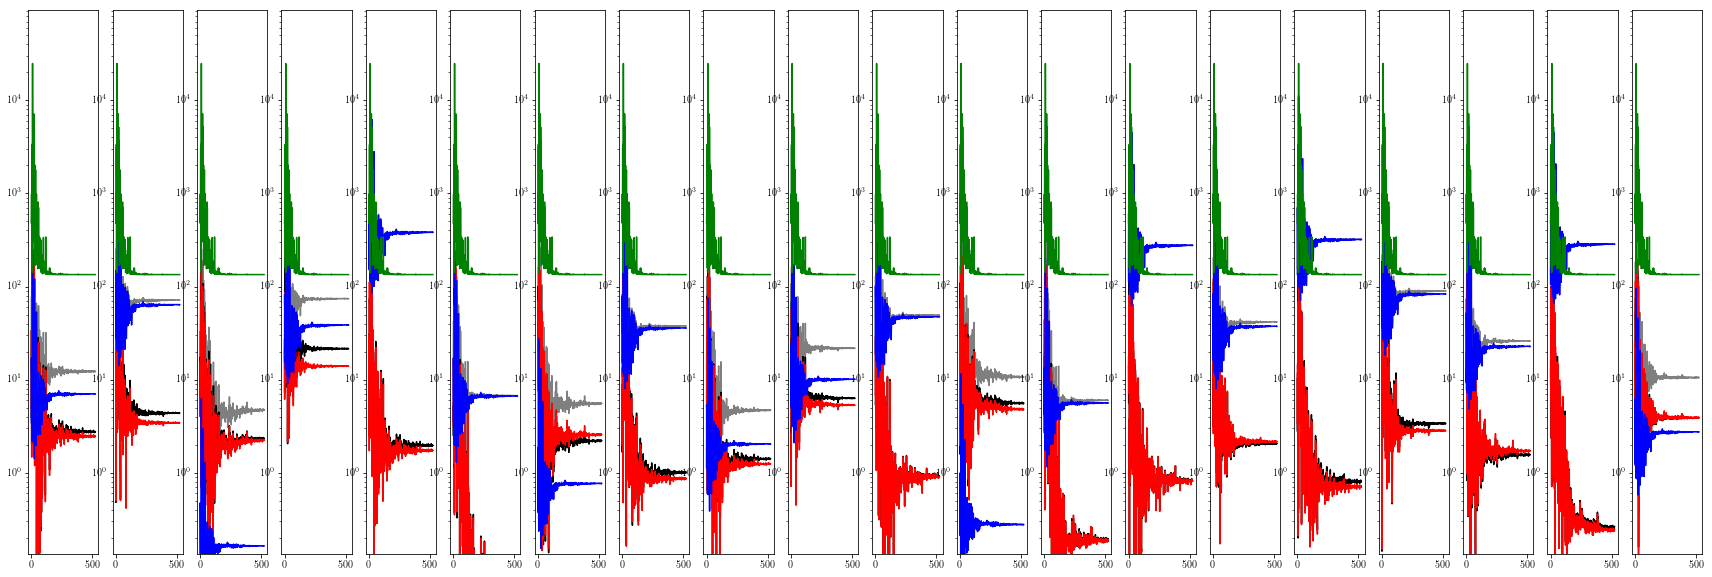

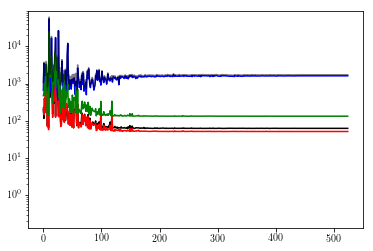

In [571]:
# plot misfit
plt.figure(figsize=[30,10])
# cmin = 1e-10
cmin = misfit_min*1e-3
# cmin = 1e-4
cmax = misfit_max
# cmin = 1e-12
for i in range(nbals):
    plt.subplot(1,nbals,i+1)
# for i in range(0,3):
#     plt.subplot(1,3,i+1)
    plt.plot(all_misfits[:,i,0],alpha = 1.0,c='k')
    plt.plot(np.sum(all_misfits[:,i,0:3],axis=1),c='k',alpha=0.5)
    plt.plot(all_misfits[:,i,1],alpha = 1.0,c='r')
    plt.plot(all_misfits[:,i,2],alpha = 1.0,c='b')
    plt.plot(all_misfits[:,i,3],alpha = 1.0,c='g')
    plt.yscale('log')
    plt.ylim([cmin,cmax])
plt.show()

plt.plot(np.sum(all_misfits[:,:,0],axis=1),c='k')
plt.plot(np.sum(all_misfits[:,:,1],axis=1),c='r')
plt.plot(np.sum(all_misfits[:,:,2],axis=1),c='b')
plt.plot(all_misfits[:,0,3],c='g')
plt.plot(np.sum(np.sum(all_misfits[:,:,0:3],axis=2),axis=1),c='k',alpha=0.5)
plt.ylim([cmin,cmax])
plt.yscale('log')
# plt.savefig('misfit_sep_100%.pdf')
plt.show()